### Loading Dataset

In [1]:
from PIL import Image
import os
from glob import glob
import numpy as np



data_path = 'dog-breeds'

img_shape = 224
classes = os.listdir(data_path)
classes = classes[:2]
class_dict = {v: k for k, v in enumerate(classes)}
print(class_dict)
image_path = glob(data_path + "*", recursive = True)
print("Different classes are - ",", ".join(classes))
print("Total no. of classes are - ", len(classes))

{'rottweiler': 0, 'dalmatian': 1}
Different classes are -  rottweiler, dalmatian
Total no. of classes are -  2


### Data Preprocessing for real sample of test data

In [76]:
data_path = 'Rott.jpg'
imm = Image.open(data_path)
imm = imm.resize((img_shape, img_shape))
imm = np.array(imm)
np.shape(imm)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ascol = imm.reshape(-1,3)
xx = scaler.fit_transform(ascol)

imm = xx.reshape(imm.shape)

print(imm)


[[[0.7372549  0.85098039 0.91269841]
  [0.74117647 0.85490196 0.91666667]
  [0.74509804 0.85882353 0.92063492]
  ...
  [0.6745098  0.78039216 0.82539683]
  [0.6745098  0.77647059 0.81746032]
  [0.67843137 0.77254902 0.81746032]]

 [[0.7372549  0.85098039 0.90873016]
  [0.74117647 0.85490196 0.90873016]
  [0.74509804 0.85882353 0.91666667]
  ...
  [0.6745098  0.78039216 0.82142857]
  [0.67843137 0.77254902 0.81746032]
  [0.6745098  0.76862745 0.81349206]]

 [[0.74509804 0.85490196 0.90873016]
  [0.74509804 0.85882353 0.90873016]
  [0.75294118 0.8627451  0.91666667]
  ...
  [0.6745098  0.76862745 0.81746032]
  [0.6745098  0.76470588 0.81349206]
  [0.6745098  0.76470588 0.81349206]]

 ...

 [[0.89411765 0.92156863 0.94444444]
  [0.89803922 0.9254902  0.9484127 ]
  [0.89803922 0.9254902  0.9484127 ]
  ...
  [0.90588235 0.9372549  0.9484127 ]
  [0.90588235 0.93333333 0.95238095]
  [0.90588235 0.93333333 0.95634921]]

 [[0.89411765 0.92156863 0.94444444]
  [0.89803922 0.9254902  0.9484127 ]


In [10]:
pwd

'/Users/sukhpreetksandhu'

### Loading the data and preprocessing

In [69]:
data = []
label = []

for c in classes:
    path = os.path.join(data_path, c)
    images = os.listdir(path)
    

    for a in images:
        image = Image.open(path + '/' + a)
        image = image.resize((img_shape,img_shape))
        image = np.array(image)

        if np.shape(image) == (img_shape, img_shape, 3):
            data.append(image)
            label.append(class_dict[c])

data = np.array(data)
label = np.array(label)
print(label)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [70]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()
ascolumns = data.reshape(-1,3)

t = scaler.fit_transform(ascolumns)
data = t.reshape(data.shape)


X_trainval, X_test, y_trainval, y_test = train_test_split(data, label, train_size = 0.8,test_size = 0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(X_trainval, y_trainval, train_size = 0.9,test_size = 0.1,random_state =42)



### One hot encoding

In [71]:
from keras.utils import to_categorical

y_train = to_categorical(y_train,2)
y_val = to_categorical(y_val,2)




### Importing the model and Neural Network Layers

In [72]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
#Conv2D(8, (3,3), activation = "relu")
#MaxPool2D(pool_size = (2,2))
#Dense(2, activation = "relu")


### Training the model

In [26]:
model = Sequential()
model.add(Conv2D(8, (3,3), input_shape = x_train.shape[1:], activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))

model.add(Dropout(rate = 0.4))
model.add(Dense(2, activation = 'softmax'))

model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

epochs = 20
history = model.fit(x_train, y_train, batch_size = 32, epochs = epochs, validation_data = (x_val, y_val))



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 222, 222, 8)       224       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 111, 111, 8)      0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 98568)             0         
                                                                 
 dense_2 (Dense)             (None, 64)                6308416   
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                      

### Accuracy Curve

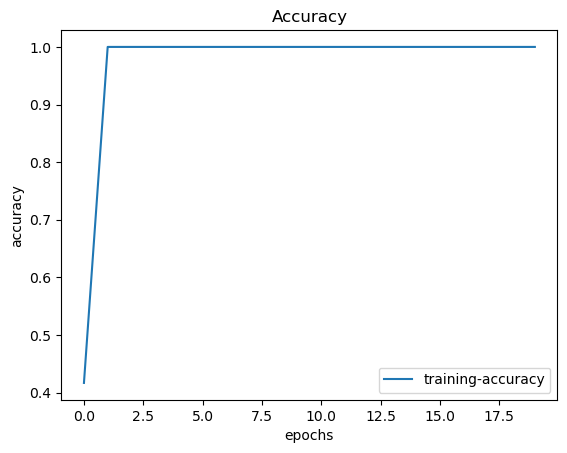

In [73]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label = 'training-accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

### Loss curve

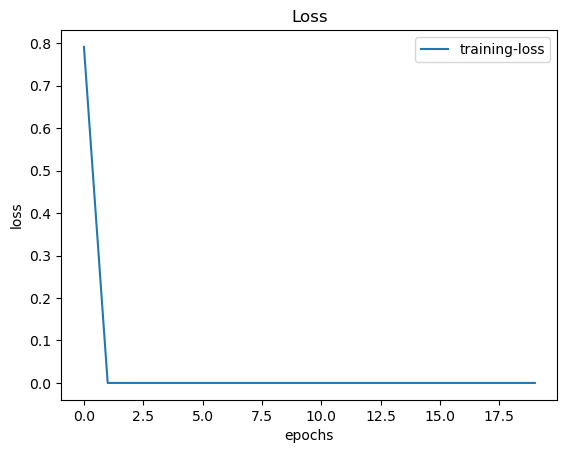

In [74]:
plt.plot(history.history['loss'], label = 'training-loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss')
plt.legend()
plt.show()

### Testing the model

In [75]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


pred = model.predict(X_test)
#print(pred)
#print(np.argmax(pred[1]))

#pred = np.argmax(model.predict(X_test), axis = 1)
#print(pred)


#cm = confusion_matrix(y_test,pred)
#print('ConfusionMatrix')
#print(cm)

#accuracy = accuracy_score(y_test,pred)
#print(accuracy)

#f1 = f1_score(y_test,pred)
#print(f1)



1/1 [==============================] - 0s 91ms/step


In [37]:
print(X_test[1].shape)

(224, 224, 3)


### Testing on real sample of Data

In [77]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

imm = imm.reshape(1,224,224,3)
print(imm.shape)
predd = np.argmax(model.predict(imm), axis = 1)
print(predd)

(1, 224, 224, 3)
1/1 [==============================] - 0s 28ms/step
[1]
